In [1]:
# Load packages
import mariadb
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import re
import openpyxl
import numpy as np

print("is loading...")

is loading...


In [4]:
# Load the data from an Excel file into the pandas DataFrame named 'data'
data = pd.read_excel('c:/Users/Victor/Documents/GitHub/hslu-cip/data/raw_data_stage1/indexes_to_scrap.xlsx')

# Head to get a preview of the data
data.head()

,COMPONENT,ISIN,TICKER,TRADING LOCATION,ISSUER COUNTRY,MIC,Subtype,Turnover,Turnover in EUR,Volume,ROA,ROE,ROIC,CCY
0,ACCOR SA,FR0000120404,AC,Euronext Paris,France,XPAR,Common Stock,4.412293e+07,4.412293e+07,1016775.0,4.0,11.9,8.0,EUR
1,L'AIR LIQUIDE SOCIETE ANONYME POUR L'ETUDE ET ...,FR0000120073,AI,Euronext Paris,France,XPAR,Common Stock,1.176671e+08,1.176671e+08,609693.0,6.1,12.9,12.1,EUR
2,AIRBUS SE,NL0000235190,1AIR,Euronext Paris,Netherlands,XPAR,Common Stock,1.657425e+08,1.657425e+08,969451.0,2.3,23.5,13.5,EUR
3,ARCELORMITTAL SA,LU1598757687,MT,Euronext Amsterdam,Luxembourg,XAMS,Common Stock,4.432131e+07,4.432131e+07,1738641.0,2.1,1.8,4.5,EUR
4,ARCELORMITTAL SA,LU1598757687,MT,Euronext Amsterdam,Luxembourg,XAMS,Common Stock,4.432131e+07,4.432131e+07,1738641.0,2.1,1.8,4.5,EUR


In [5]:
data.columns

Index(['COMPONENT', 'ISIN', 'TICKER', 'TRADING LOCATION', 'ISSUER COUNTRY',
       'MIC', 'Subtype', 'Turnover', 'Turnover in EUR', 'Volume', 'ROA', 'ROE',
       'ROIC', 'CCY'],
      dtype='object')

In [6]:
# Print the concise summary of the DataFrame, including the number of non-null values in each column
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   COMPONENT         196 non-null    object 
 1   ISIN              196 non-null    object 
 2   TICKER            196 non-null    object 
 3   TRADING LOCATION  196 non-null    object 
 4   ISSUER COUNTRY    196 non-null    object 
 5   MIC               196 non-null    object 
 6   Subtype           184 non-null    object 
 7   Turnover          183 non-null    float64
 8   Turnover in EUR   183 non-null    float64
 9   Volume            182 non-null    float64
 10  ROA               187 non-null    float64
 11  ROE               190 non-null    float64
 12  ROIC              173 non-null    float64
 13  CCY               176 non-null    object 
dtypes: float64(6), object(8)
memory usage: 21.6+ KB
None


In [7]:
# Data type transformation

data['TRADING LOCATION'] = data['TRADING LOCATION'].astype("category") # Convert the 'TRADING LOCATION' column data type to 'category'
data['ISSUER COUNTRY'] = data['ISSUER COUNTRY'].astype("category") # Convert the 'ISSUER COUNTRY' column data type to 'category
data['INDEX.'] = data['INDEX.'].astype("category") # Convert the 'INDEX' column data type to 'category'
data['CCY'] = data['CCY'].astype("category") # Convert the 'CCY' column data type to 'category'

# Print the updated summary of the DataFrame
data.info()

KeyError: 'INDEX.'

# Review of unique values and values not present:

As the data I am working with belongs to unique and separate business it is important for me to verify that these companies ISINs etc are different and that they all have certain unique identifiers and that there is no missing data (at all)

In [54]:
# Check unique values of the DF

for col in data.columns: # Loop through each column in the DataFrame
    print(f" - {col}: {data[col].nunique()} unique values")  # Print the column name and the number of unique values in that column

 - COMPONENT: 190 unique values
 - ISIN: 189 unique values
 - TRADING LOCATION: 8 unique values
 - ISSUER COUNTRY: 13 unique values
 - INDEX.: 7 unique values
 - MIC: 8 unique values
 - Subtype: 1 unique values
 - Turnover: 178 unique values
 - Turnover in EUR: 178 unique values
 - Volume: 177 unique values
 - ROA: 102 unique values
 - ROE: 146 unique values
 - ROIC: 128 unique values
 - CCY: 2 unique values


In [55]:
# Check NA values of the DF

na_counts = data.isna().sum()  # Count the number of NA values in each column

# Loop through the Series and print out the counts in a formatted string
for column_name, na_count in na_counts.items():
    print(f" - {column_name}: {na_count} missing values (NA)")

 - COMPONENT: 0 missing values (NA)
 - ISIN: 0 missing values (NA)
 - TRADING LOCATION: 0 missing values (NA)
 - ISSUER COUNTRY: 0 missing values (NA)
 - INDEX.: 0 missing values (NA)
 - MIC: 0 missing values (NA)
 - Subtype: 12 missing values (NA)
 - Turnover: 13 missing values (NA)
 - Turnover in EUR: 13 missing values (NA)
 - Volume: 14 missing values (NA)
 - ROA: 9 missing values (NA)
 - ROE: 6 missing values (NA)
 - ROIC: 23 missing values (NA)
 - CCY: 20 missing values (NA)


# Preliminary study of the data through visualizations, Boxplots, histograms and correlation plots.

A picture is worth a thousand words so I want to see what my data looks like to see if I have to clean it and there is something abnormal

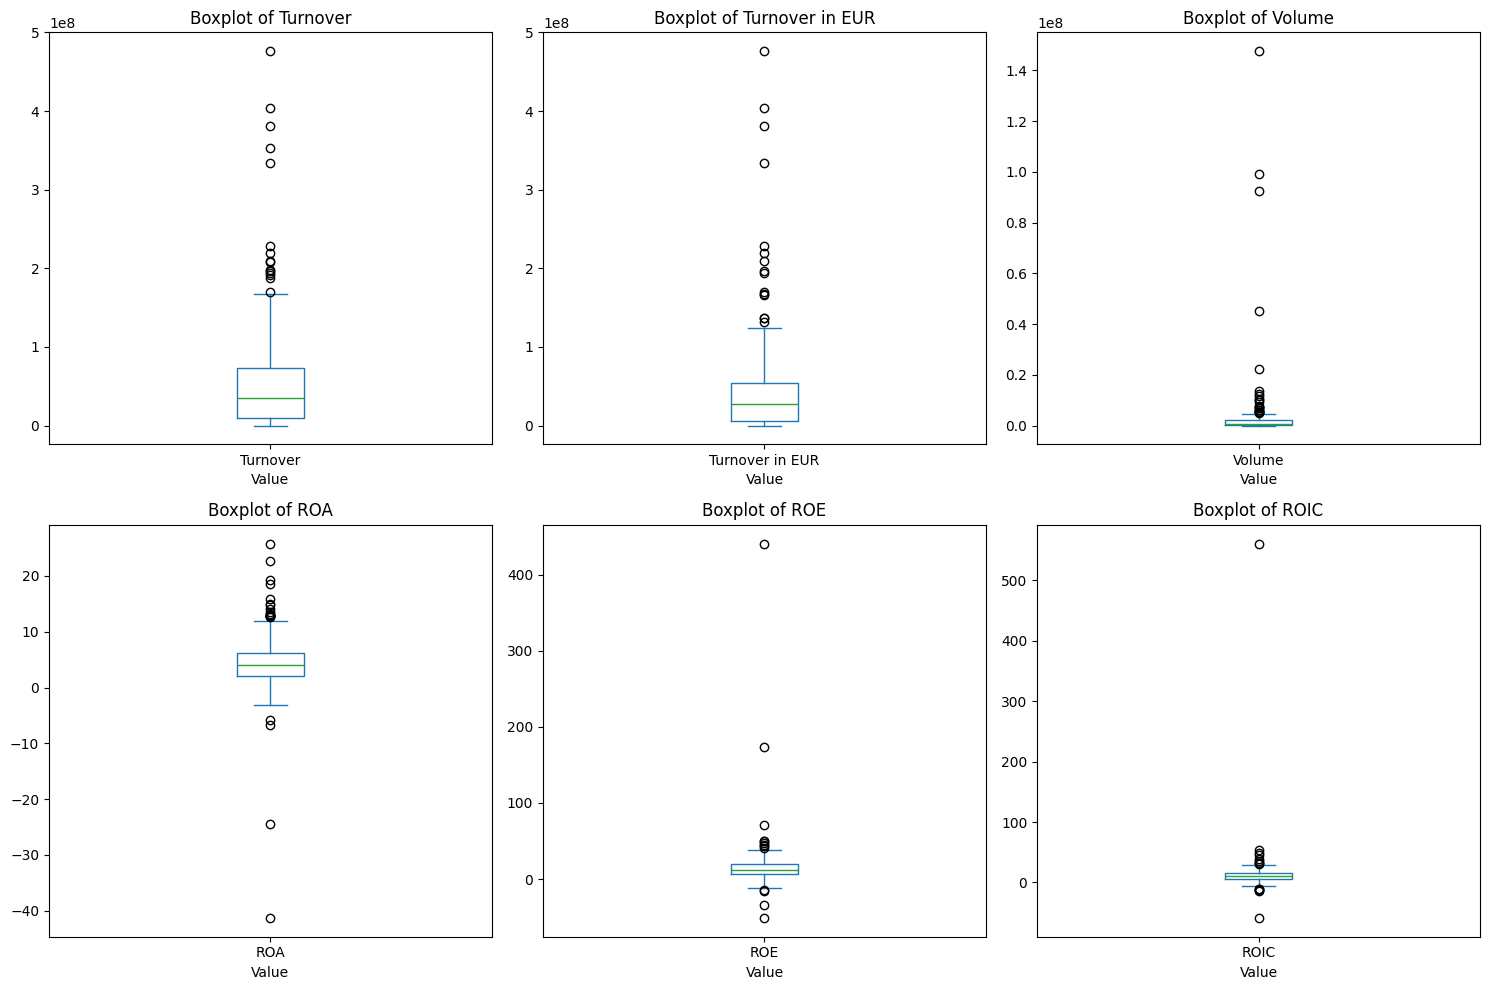

In [56]:
# Creates boxplots for numerical columns in the df DATA.

# Selecting numerical columns from the DataFrame
numerical_columns = data.select_dtypes(include=['number']).columns

# Creating a figure and axes for the boxplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))# Setup the subplots to have 2 rows and 3 columns

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through the numerical columns and create a boxplot for each
for ax, col in zip(axes, numerical_columns):
    # Set vert=False for horizontal boxplots
    data[col].plot(kind='box', ax=ax)
    ax.set_title(f'Boxplot of {col}')
    ax.set_xlabel('Value')

for i in range(len(numerical_columns), 6):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

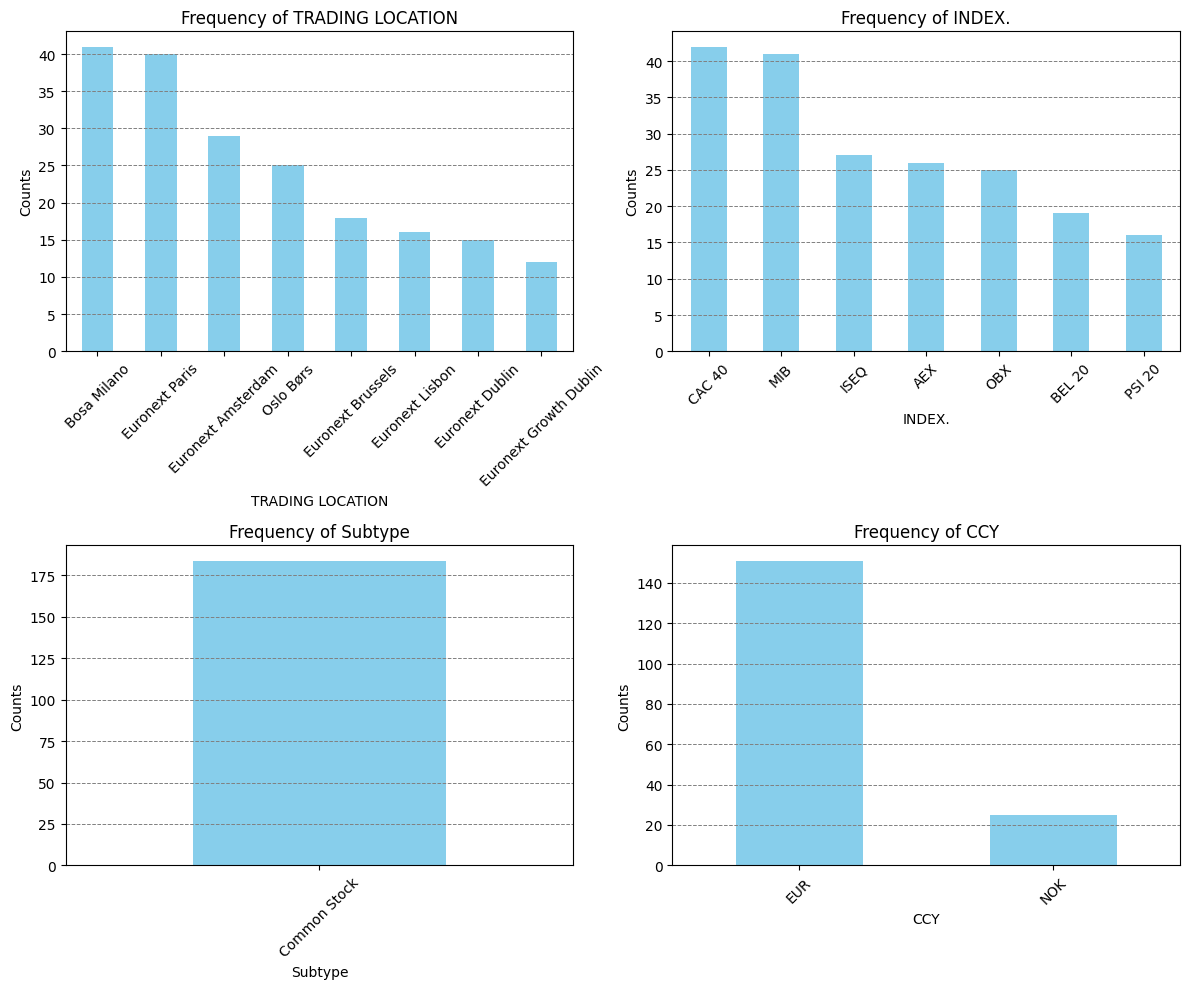

In [57]:
# Creates boxplots for categorical columns in the df DATA.

# List of categorical columns I want to plot
specific_columns = ['TRADING LOCATION', 'INDEX.', 'Subtype', 'CCY']

# Create a 2x2 subplot layout
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Loop through the specific columns and the axes simultaneously
for ax, col in zip(axs, specific_columns):
    data[col].value_counts().plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(f'Frequency of {col}')
    ax.set_ylabel('Counts')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.yaxis.grid(True, linestyle='--', linewidth=0.7, color='grey')  # Add horizontal grid lines for readability

# Adjust the layout so that titles, labels, and ticks don't overlap
plt.tight_layout()

# Show the plot
plt.show()

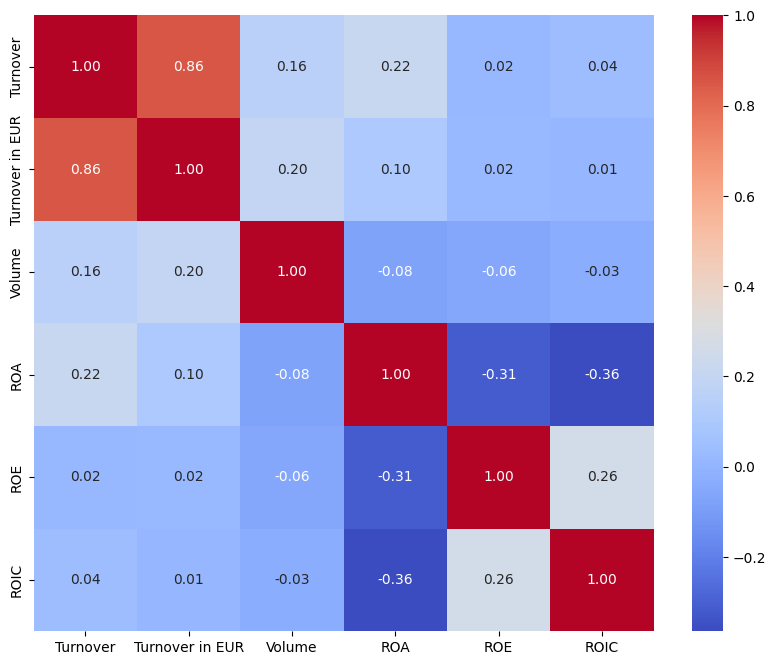

In [58]:
#  Heatmap of the correlation matrix for the df DATA

# Select only the numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

# Then compute the correlation matrix
corr_matrix = numeric_data.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()  # Display the plot


# Identification of duplicate rows and their cleaning:

Since we will later make merch with another data frame, we want to avoid duplications that could complicate the process.

In [59]:
# Find duplicate rows in the dataframe DATA
duplicate_rows = data[data.duplicated()]

# Number of duplicate rows
num_duplicate_rows = duplicate_rows.shape[0]

print(f" - Number of duplicate rows in the DataFrame: {num_duplicate_rows}")

# Drop duplicates from the original DataFrame
data.drop_duplicates(inplace=True)

# Re-check for duplicate rows in the updated DataFrame
new_duplicate_rows = data[data.duplicated()]

# New number of duplicate rows
new_num_duplicate_rows = new_duplicate_rows.shape[0]

print(f" - Number of duplicates after dropping them from the DataFrame: {new_num_duplicate_rows}")

 - Number of duplicate rows in the DataFrame: 2
 - Number of duplicates after dropping them from the DataFrame: 0


# Data cleaning.

Now that we have realized that the data seems quite clean, I  will proceed to clean it definitively. The data itself is already ok since most of it is identifiers extracted from the Six API, which is supposed to be of high quality.

That is why I  have decided to get it dirty and clean it to demonstrate our knowledge on the subject.

First cleaning:

I have created a function that randomly dirty the data with a 50 percent chance with a very common error, periods and commas are a big problem in the financial world because they can confuse users. We have also created the function that cleans these numbers by assigning them all a point, the standard within the industry.

In [60]:
# Cleaning Step 1: Randomly Swapping Commas and Dots

def dirty_one(value):
  """
  This function randomly swaps commas (,) and dots (.) in a value using regular expressions.

  Args:
      value: The value to be processed, namely every value of a column.

  Returns:
      The value with commas and dots potentially swapped or the original value if it's missing (NaN).

  """

  if pd.notna(value):
    # Convert to string for regex handling
    value_str = str(value)
    # Use regex to find commas (,) or dots (.) and replace them randomly with the other
    formatted_value = re.sub(r'[,.]', lambda x: '.' if x.group(0) == ',' and random.random() > 0.5 else ',' if x.group(0) == '.' and random.random() > 0.5 else x.group(0), value_str)
    return formatted_value
  return value

# Apply the function to'ROA', 'ROE', 'ROIC'
for col in ['ROA', 'ROE', 'ROIC']:
    data[col] = data[col].apply(dirty_one)

data.tail(5)

,COMPONENT,ISIN,TRADING LOCATION,ISSUER COUNTRY,INDEX.,MIC,Subtype,Turnover,Turnover in EUR,Volume,ROA,ROE,ROIC,CCY
191,TELECOM ITALIA,IT0003497168,Bosa Milano,Italy,MIB,MTAA,Common Stock,3.329250e+07,3.329250e+07,147625871.0,1.4,"-6,1",2.7,EUR
192,TENARIS,LU0156801721,Bosa Milano,Luxembourg,MIB,MTAA,NaN,NaN,NaN,NaN,14.0,25.5,"23,5",NaN
193,TERNA,IT0003242622,Bosa Milano,Italy,MIB,MTAA,Common Stock,2.805781e+07,2.805781e+07,3654952.0,4.0,14.1,8.1,EUR
194,UNICREDIT,IT0004781412,Bosa Milano,Italy,MIB,MTAA,Common Stock,4.044500e+08,4.044500e+08,11556193.0,1.2,"14,9",NaN,EUR
195,UNIPOL,IT0004810054,Bosa Milano,Italy,MIB,MTAA,Common Stock,1.148265e+07,1.148265e+07,1480777.0,"1,9","14,5","15,2",EUR


In [61]:
# Cleaning Step 1: Swapping Commas and Dots to Dots.

def clean_one(value):
  """
  This function cleans a numerical value by replacing commas (,) with dots (.) and converting it to a float (if possible).

  Args:
      value: The value to be processed, namely every value of a column.

  Returns:
      The cleaned value as a float (if possible) or the original value if it's missing (NaN).

  Handles potential errors during conversion by using 'coerce' in pd.to_numeric. This replaces non-numeric values with NaNs.
  """

  if pd.notna(value):
    # Convert to string for consistent handling (in case it's not already)
    value_str = str(value)
    # Replace commas with dots to ensure consistent decimal representation
    cleaned = value_str.replace(',', '.')
    # Attempt conversion to float, handling errors with 'coerce'
    return pd.to_numeric(cleaned, errors='coerce')
  return value

# Apply the function to'ROA', 'ROE', 'ROIC'
for col in ['ROA', 'ROE', 'ROIC']:
    data[col] = data[col].apply(clean_one)

data.tail(5)

,COMPONENT,ISIN,TRADING LOCATION,ISSUER COUNTRY,INDEX.,MIC,Subtype,Turnover,Turnover in EUR,Volume,ROA,ROE,ROIC,CCY
191,TELECOM ITALIA,IT0003497168,Bosa Milano,Italy,MIB,MTAA,Common Stock,3.329250e+07,3.329250e+07,147625871.0,1.4,-6.1,2.7,EUR
192,TENARIS,LU0156801721,Bosa Milano,Luxembourg,MIB,MTAA,NaN,NaN,NaN,NaN,14.0,25.5,23.5,NaN
193,TERNA,IT0003242622,Bosa Milano,Italy,MIB,MTAA,Common Stock,2.805781e+07,2.805781e+07,3654952.0,4.0,14.1,8.1,EUR
194,UNICREDIT,IT0004781412,Bosa Milano,Italy,MIB,MTAA,Common Stock,4.044500e+08,4.044500e+08,11556193.0,1.2,14.9,NaN,EUR
195,UNIPOL,IT0004810054,Bosa Milano,Italy,MIB,MTAA,Common Stock,1.148265e+07,1.148265e+07,1480777.0,1.9,14.5,15.2,EUR


Second cleaning:

A function that aims to put negative numbers in parentheses has been implemented since many times in the financial world negative numbers can be seen like this. Later we returned it to its usual form since with parentheses the column will become a string, which cannot be operated on.

In [62]:
# Cleaning Step 2: Removing Negative Signs and transforming them in parenthesis for ROA ROE ROIC

def dirty_two(value):
  """
  This function attempts to remove negative signs from numerical values using regular expressions.

  Args:
      value: The value to be processed (typically from a DataFrame column).
  Returns:
      The value with negative signs removed (as a string) or the original value if it's missing (NaN).

  """

  if pd.notna(value):
    # Convert to string for regex handling
    value_str = str(value)
    # Use regex to find negative numbers and replace with parentheses (incorrect!)
    formatted_value = re.sub(r'-([\d.]+)', r'(\1)', value_str)
    return formatted_value
  return value

# Columns to change
columns_to_modify = ['ROA', 'ROE', 'ROIC']

# Apply the function to'ROA', 'ROE', 'ROIC'
for col in columns_to_modify:
    data[col] = data[col].apply(dirty_two)

data.tail(5)

,COMPONENT,ISIN,TRADING LOCATION,ISSUER COUNTRY,INDEX.,MIC,Subtype,Turnover,Turnover in EUR,Volume,ROA,ROE,ROIC,CCY
191,TELECOM ITALIA,IT0003497168,Bosa Milano,Italy,MIB,MTAA,Common Stock,3.329250e+07,3.329250e+07,147625871.0,1.4,(6.1),2.7,EUR
192,TENARIS,LU0156801721,Bosa Milano,Luxembourg,MIB,MTAA,NaN,NaN,NaN,NaN,14.0,25.5,23.5,NaN
193,TERNA,IT0003242622,Bosa Milano,Italy,MIB,MTAA,Common Stock,2.805781e+07,2.805781e+07,3654952.0,4.0,14.1,8.1,EUR
194,UNICREDIT,IT0004781412,Bosa Milano,Italy,MIB,MTAA,Common Stock,4.044500e+08,4.044500e+08,11556193.0,1.2,14.9,NaN,EUR
195,UNIPOL,IT0004810054,Bosa Milano,Italy,MIB,MTAA,Common Stock,1.148265e+07,1.148265e+07,1480777.0,1.9,14.5,15.2,EUR


In [63]:
# Cleaning Step 2: Converting parentheses back to negative signs for ROA ROE ROIC

def clean_two(value):
    """
    This function converts values enclosed in parentheses to negative numbers in a DataFrame column.

    Args:
        value: The value to be processed (typically from a DataFrame column).

    Returns:
        The value with parentheses converted to negative signs (as a float) 
        or the original value if it's missing (NaN).
    """

    if pd.notna(value):
        # Convert to string for consistent regular expression handling
        value_str = str(value)
        # Remove commas from the string
        value_str = value_str.replace(',', '')
        # Use regex to find numbers in parentheses and replace with negative numbers
        formatted_value = re.sub(r'\(([\d.]+)\)', r'-\1', value_str)
        # Convert back to float for numerical operations
        return float(formatted_value)
    return value
    
# Columns to change
columns_to_modify = ['ROA', 'ROE', 'ROIC']

# Apply the function to'ROA', 'ROE', 'ROIC'
for col in columns_to_modify:
    data[col] = data[col].apply(clean_two)

data.tail(5)

,COMPONENT,ISIN,TRADING LOCATION,ISSUER COUNTRY,INDEX.,MIC,Subtype,Turnover,Turnover in EUR,Volume,ROA,ROE,ROIC,CCY
191,TELECOM ITALIA,IT0003497168,Bosa Milano,Italy,MIB,MTAA,Common Stock,3.329250e+07,3.329250e+07,147625871.0,1.4,-6.1,2.7,EUR
192,TENARIS,LU0156801721,Bosa Milano,Luxembourg,MIB,MTAA,NaN,NaN,NaN,NaN,14.0,25.5,23.5,NaN
193,TERNA,IT0003242622,Bosa Milano,Italy,MIB,MTAA,Common Stock,2.805781e+07,2.805781e+07,3654952.0,4.0,14.1,8.1,EUR
194,UNICREDIT,IT0004781412,Bosa Milano,Italy,MIB,MTAA,Common Stock,4.044500e+08,4.044500e+08,11556193.0,1.2,14.9,NaN,EUR
195,UNIPOL,IT0004810054,Bosa Milano,Italy,MIB,MTAA,Common Stock,1.148265e+07,1.148265e+07,1480777.0,1.9,14.5,15.2,EUR


Third cleaning:

The component column is capitalized as the only column within the entire dataset, so I have decided to make it more comfortable to read and capitalize the first letter of each of the words through a lambda function.

In [64]:
# Apply title case to the 'COMPONENT' column
data['COMPONENT'] = data['COMPONENT'].apply(lambda x: x.title() if pd.notna(x) else x)

# Check the data
data.head()

,COMPONENT,ISIN,TRADING LOCATION,ISSUER COUNTRY,INDEX.,MIC,Subtype,Turnover,Turnover in EUR,Volume,ROA,ROE,ROIC,CCY
0,Accor,FR0000120404,Euronext Paris,France,CAC 40,XPAR,Common Stock,4.412293e+07,4.412293e+07,1016775.0,4.0,11.9,8.0,EUR
1,Air Liquide,FR0000120073,Euronext Paris,France,CAC 40,XPAR,Common Stock,1.176671e+08,1.176671e+08,609693.0,6.1,12.9,12.1,EUR
2,Airbus,NL0000235190,Euronext Paris,Netherlands,CAC 40,XPAR,Common Stock,1.657425e+08,1.657425e+08,969451.0,2.3,23.5,13.5,EUR
3,Arcelormittal Sa,LU1598757687,Euronext Amsterdam,Luxembourg,CAC 40,XAMS,Common Stock,4.432131e+07,4.432131e+07,1738641.0,2.1,1.8,4.5,EUR
5,Axa,FR0000120628,Euronext Paris,France,CAC 40,XPAR,Common Stock,1.214798e+08,1.214798e+08,3490177.0,0.9,12.8,7.5,EUR


# Creation of new columns and data quality control.

Unfortunately I haven't found new columns to do, so I decided to check if the issuer country is OK through the ISIN

In [65]:
# Extract Country Code from the first 2 characters of ISIN
data['Country Code'] = data['ISIN'].str[:2]

# Extract Unique Identifier from the remaining characters of ISIN (after position 2)
data['Unique Identifier'] = data['ISIN'].str[2:]

# Function
def compare_columns(data, column1, column2):
  """
  This function compares the number of unique values in two columns of a DataFrame.

  Args:
      data: The DataFrame containing the columns to compare.
      column1: The name of the first column.
      column2: The name of the second column.

  Prints a message comparing the number of unique values in each column.
  """

  num_distinct_column1 = data[column1].nunique() # Count the number of distinct values in column1
  num_distinct_column2 = data[column2].nunique() # Count the number of distinct values in column2
  are_equal = num_distinct_column1 == num_distinct_column2 # Check if the number of distinct values are equal

  # Print the results in a readable format
  print(f" - Number of distinct values in '{column1}': {num_distinct_column1}")
  print(f" - Number of distinct values in '{column2}': {num_distinct_column2}")

  if are_equal:
      print(f" - The number of distinct values in '{column1}' and '{column2}' are equal.")
  else:
      print(f" - The number of distinct values in '{column1}' and '{column2}' are different.")

# Compare the number of unique values in 'Country Code' and 'ISSUER COUNTRY' columns
compare_columns(data, 'Country Code', 'ISSUER COUNTRY')


 - Number of distinct values in 'Country Code': 13
 - Number of distinct values in 'ISSUER COUNTRY': 13
 - The number of distinct values in 'Country Code' and 'ISSUER COUNTRY' are equal.


Drop of columns

In [66]:
def drop_columns(data, columns_to_drop):
    # Elimina las columnas especificadas
    data = data.drop(columns_to_drop, axis=1)
    return data

columns_to_drop = ['Subtype', 'MIC', "Unique Identifier", "Country Code"]

data = drop_columns(data, columns_to_drop)
data.head(5)

,COMPONENT,ISIN,TRADING LOCATION,ISSUER COUNTRY,INDEX.,Turnover,Turnover in EUR,Volume,ROA,ROE,ROIC,CCY
0,Accor,FR0000120404,Euronext Paris,France,CAC 40,4.412293e+07,4.412293e+07,1016775.0,4.0,11.9,8.0,EUR
1,Air Liquide,FR0000120073,Euronext Paris,France,CAC 40,1.176671e+08,1.176671e+08,609693.0,6.1,12.9,12.1,EUR
2,Airbus,NL0000235190,Euronext Paris,Netherlands,CAC 40,1.657425e+08,1.657425e+08,969451.0,2.3,23.5,13.5,EUR
3,Arcelormittal Sa,LU1598757687,Euronext Amsterdam,Luxembourg,CAC 40,4.432131e+07,4.432131e+07,1738641.0,2.1,1.8,4.5,EUR
5,Axa,FR0000120628,Euronext Paris,France,CAC 40,1.214798e+08,1.214798e+08,3490177.0,0.9,12.8,7.5,EUR


In [67]:
# Iterate over each row in the DataFrame

data = data.where(pd.notnull(data), None)

for index, row in data.iterrows():
    # Extract data from the DataFrame row using the new column names
    component = row['COMPONENT']
    isin = row['ISIN']
    trading_location = row['TRADING LOCATION']
    issuer_country = row['ISSUER COUNTRY']
    index_name = row['INDEX.']
    turnover = row['Turnover']
    turnover_in_eur = row['Turnover in EUR']
    volume = row['Volume']
    roa = row['ROA']
    roe = row['ROE']
    roic = row['ROIC']
    ccy = row['CCY']

    # Execute INSERT query
    try:
        query = """
        INSERT INTO tbl_financial_data
        (`component`, `isin`, `trading_location`, `issuer_country`, `index_name`, `turnover`, 
        `turnover_in_eur`, `volume`, `roa`, `roe`, `roic`, `ccy`) 
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
        """
        cur.execute(query, (component, isin, trading_location, issuer_country, index_name, turnover, 
                            turnover_in_eur, volume, roa, roe, roic, ccy))
    except mariadb.Error as e:
        print(f"Error: {e}")
        continue

# Commit changes to the database
conn.commit()

# After committing, you can also confirm by printing a simple success message
print("Data insertion complete.")


Error: Unknown column 'nan' in 'field list'
Error: Unknown column 'nan' in 'field list'
Error: Unknown column 'nan' in 'field list'
Error: Unknown column 'nan' in 'field list'
Error: Unknown column 'nan' in 'field list'
Error: Unknown column 'nan' in 'field list'
Error: Unknown column 'nan' in 'field list'
Error: Unknown column 'nan' in 'field list'
Error: Unknown column 'nan' in 'field list'
Error: Unknown column 'nan' in 'field list'
Error: Unknown column 'nan' in 'field list'
Error: Unknown column 'nan' in 'field list'
Error: Unknown column 'nan' in 'field list'
Error: Unknown column 'nan' in 'field list'
Error: Unknown column 'nan' in 'field list'
Error: Unknown column 'nan' in 'field list'
Error: Unknown column 'nan' in 'field list'
Error: Unknown column 'nan' in 'field list'
Error: Unknown column 'nan' in 'field list'
Error: Unknown column 'nan' in 'field list'
Error: Unknown column 'nan' in 'field list'
Error: Unknown column 'nan' in 'field list'
Error: Unknown column 'nan' in '